# Simple MDP Design
Grzegorz Malisz
Student Number: 4852370
[GitHub Repository](https://github.com/grzgm/deth)

In [11]:
import random
from math import isclose
import copy
from IPython.display import Image

## Assignment 1

### MDP definition ver 1
A set of states $S$: continuous or discrete
A set of actions $A$: continuous or discrete
A set of rewards $R$: continuous or discrete
For each state $s \in S$ there are permitted actions $a \in A(s)$
Transition Probabilities: $p(s_{t+1}, r_{t+1}|s_t, a_t)$

With this version we can calculate the probability of moving to certain state $s_{t+1}$ and acquiring reward $r_{t+1}$, given that we are in the state $s_t$ and do action $a_t$.

### MDP definition ver 2
A set of states $S$: continuous or discrete
A set of actions $A$: continuous or discrete
A set of rewards $R$: continuous or discrete
For each state $s \in S$ there are permitted actions $a \in A(s)$
Transition Probabilities: $p(s_{t+1}|s_t, a_t)$
Deterministic function of $r_{t+1} = f(s_t, s_{t+1}, a_t)$

With this version we can calculate the probability of moving to certain state $s_{t+1}$, given that we are in the state $s_t$ and do action $a_t$. And we can also calculate the reward $r_{t+1}$ from performing $a_t$ in $s_{t+1}$ and finishing in $s_t$.

### Assignment 1.1: MDP ver1 vs ver2
The most notable difference between those two definitions is the fact that ver 1 calculates already possibility of ending up in $s_{t+1}, r_{t+1}$, while ver 2 calculates first probability of ending up in the $s_{t+1}$, and then we can get the deterministic function to calculate the expected reward $r_{t+1}$. Also the ver 2 does not work with a stochastic reward system, by that I mean that for ver 2 to work for every $s_{t+1}, s_t, a_t$ there is deterministic reward $r_{t+1}$

### Assignment 1.2: generic stochastic MDP
This Python Class for generic MDP implements formal definition of MDP ver 2 (states, actions, rewards, permitted actions, transition probabilities, reward function). Variables below are added to illustrate the behaviour of MDP. Permitted actions are solved by using the input (`transition_probabilities`, `rewards`) that consist only of permitted actions and `lookup_transition_probability`, `lookup_reward` functions which in case of forbidden action return adequate value. In addition, for next assignments `start_state`, `terminal_states` and `random_termination` were implemented. The structure of variables will be shown in next assignments.

In [12]:
class MDP:
    def __init__(self, states, actions, transition_probabilities, rewards, start_state, terminal_states = {}, gamma=0.9, eps=1e6, random_termination=0.0,
                 cost_of_living=0.0):
        self.states = states
        self.actions = actions
        self.transition_probabilities = transition_probabilities
        self.inspect_probabilities()
        self.rewards = rewards
        self.start_state = start_state
        self.terminal_states = terminal_states
        self.gamma = gamma
        self.eps = eps
        self.random_termination = random_termination
        assert 0 <= self.random_termination <= 1
        self.cost_of_living = cost_of_living

        self.value = {}
        for state in states:
            self.value[state] = 0.0

    # def reset(self):
    #     for state in self.states:
    #         self.value[state] = 0.0

    def lookup_transition_probability(self, state: str, action: str, next_state: str):
        return self.transition_probabilities[state].get(action, {}).get(next_state, 0.0)

    def lookup_reward(self, state: str, action: str, next_state: str):
        return self.transition_probabilities[state].get(action, {}).get(next_state, 0)

    def inspect_probabilities(self):
        for state in self.transition_probabilities.values():
            for action in state.values():
                assert isclose(sum(action.values()), 1, abs_tol=1e-4)

    # def value(self, state: str):
    #     pass

    # def action_value(self, state: str, action: str):
    #     next_states = self.transition_probabilities[state].get(action, {})
    #     return sum(self.lookup_transition_probability(state, action, next_state) * (
    #             self.lookup_reward(state, action, next_state) + self.gamma * self.value[next_state]) for next_state
    #                in next_states)
    #
    # def policy_random(self):
    #     return random.choice(self.actions)
    #
    # def estimate_value(self):
    #     for _ in range(int(self.eps)):
    #         for state in self.states:
    #             self.value[state] = self.action_value(state, self.policy_random())

### Assignment 1.3: MDP form image

Code below uses states, actions, rewards, and probabilities form the image. It was a simple rewriting values form the image.

In [13]:
states = ['s0', 's1', 's2']
actions = ['a0', 'a1']

transition_probabilities = {
    's0': {'a0': {'s0': 0.5, 's2': 0.5},
           'a1': {'s2': 1}},
    's1': {'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
           'a1': {'s1': 0.95, 's2': 0.05}},
    's2': {'a0': {'s0': 0.4, 's2': 0.6},
           'a1': {'s0': 0.3, 's1': 0.3, 's2': 0.4}},
}

rewards = {
    's0': {},
    's1': {'a0': {'s0': 5}},
    's2': {
        'a1': {'s0': -1}},
}

## Assignment 2
Clarification Note:
`is_slippery` is named random_termination, as I believe that it better reflects the purpose of this variable.

### Assignment 2.1
Squares are numbered from 0 to 4. Permitted actions are left (l) and right (r) if they are not transitioning the agent outside of the environment. `random_termination`, `cost_of_living` can be specified by user.

In [14]:
states = ['0', '1', '2', '3', '4']
actions = ['l', 'r']

transition_probabilities = {
    '0': {'r': {'1': 1}},
    '1': {'l': {'0': 1},
          'r': {'2': 1}},
    '2': {'l': {'1': 1},
          'r': {'3': 1}},
    '3': {'l': {'2': 1},
          'r': {'4': 1}},
    '4': {'l': {'3': 1}},
}

rewards = {
    '1': {'l': {'0': -1}},
    '3': {'r': {'4': 1}},
}

terminal_states = ['0', '4']

mdp = MDP(states, actions, transition_probabilities, rewards, '2', terminal_states, random_termination=0.3, cost_of_living=-1.5)

### Assignment 2.2
States are represented by x and y coordinates on the grid. Actions indicate move on the x or y axis. `transition_probabilities` are generated, as writing them by hand would be waste of time. Rewards follow the same strategy. Bottom states are also implemented. Solution can be scaled for larger grids.

In [15]:
# # print the states
# for y in range(3):
#     for x in range(5):
#         print((x, y), end=", ")
#     print("")

# grid world (x, y)
states = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0),
          (0, 1), (1, 1), (2, 1), (3, 1), (4, 1),
          (0, 2), (1, 2), (2, 2), (3, 2), (4, 2)]
# right, left, up, down
actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

transition_probabilities = {}

# generate transition_probabilities
for state in states:
    transition_probabilities[state] = {}
    for action in actions:
        if 0 <= state[0] + action[0] <= 4 and 0 <= state[1] + action[1] <= 4:
            transition_probabilities[state][action] = {(state[0] + action[0], state[1] + action[1]): 1}

# same structure for rewards
rewards = copy.deepcopy(transition_probabilities)

for state in rewards:
    amount_of_actions = len(rewards[state])
    for action in rewards[state]:
        for next_state in rewards[state][action]:
            if next_state in [(1, 2), (2, 2), (3, 2), (4, 2)]:
                rewards[state][action][next_state] = -1
            else:
                rewards[state][action][next_state] = 0

# terminal states
terminal_states = [(1, 2), (2, 2), (3, 2), (4, 2)]

# start
start_state = (0, 2)

mdp = MDP(states, actions, transition_probabilities, rewards, start_state, terminal_states)

### Assignment 2.3
WIP

## Assignment 3

### Assignment 3.1

#### Assignment 3.1.1
For agent with random move policy, he can walk for the eternity, by choosing between for example state $s_1$ and $s_2$. For this reason I have provided the general formulas.

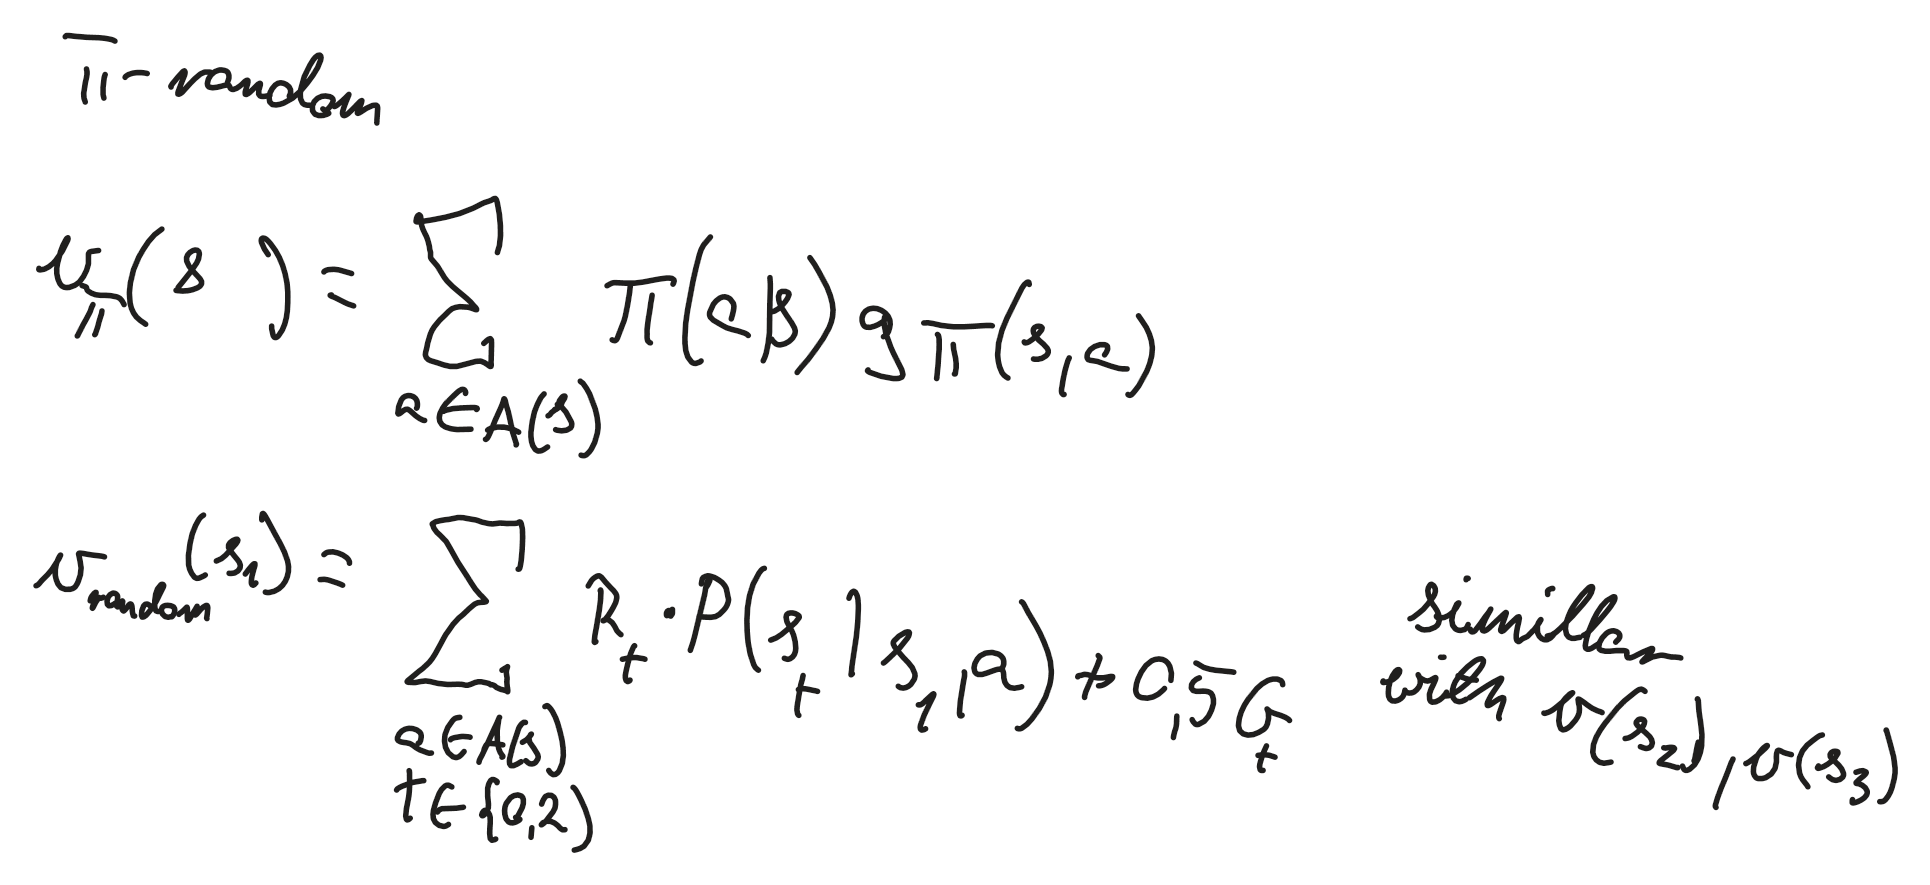

In [16]:
Image(filename='img/3_1_1.png')

#### Assignment 3.1.2
Agent from the states $s_1$, $s_2$, $s_3$ can go to the $s_4$, but if the agent is already in one of the terminal states ($s_0$, $s_4$), he cannot proceed further, but while calculating $v$, from what I understood I omit the terminal states, so this lead to answers below. $s_4$ has 0, as if agent goes to $s_4$, he cannot go from $s_4$ to $s_4$, unless we allow him to stay in place as an action.

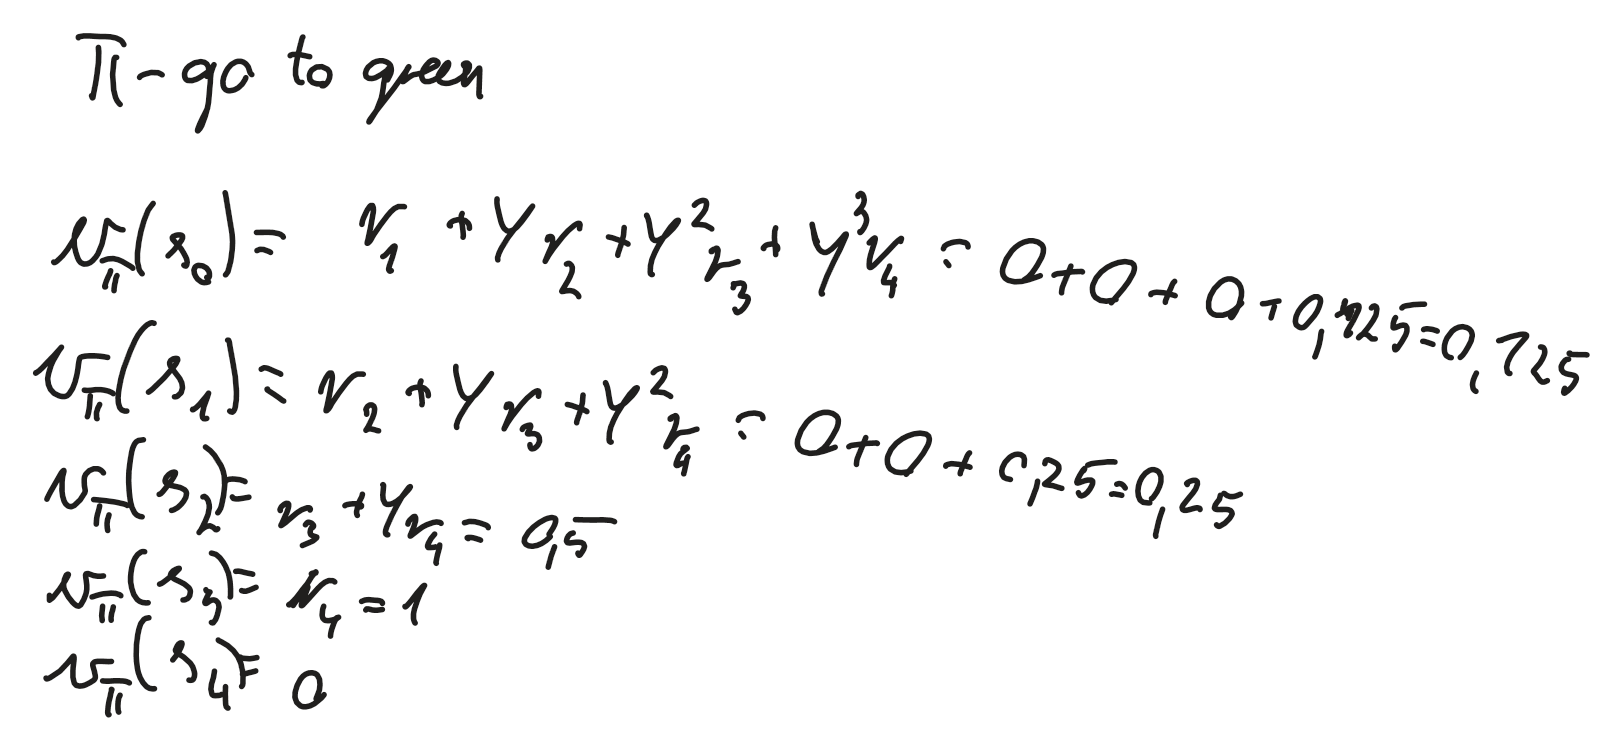

In [17]:
Image(filename='img/3_1_2.png')

## Assignment 3.2

#### Assignment 3.2.1
Cost of living (`-0.1`) should be reduced after every step, rest is similar, like in Assignment 3.1.1

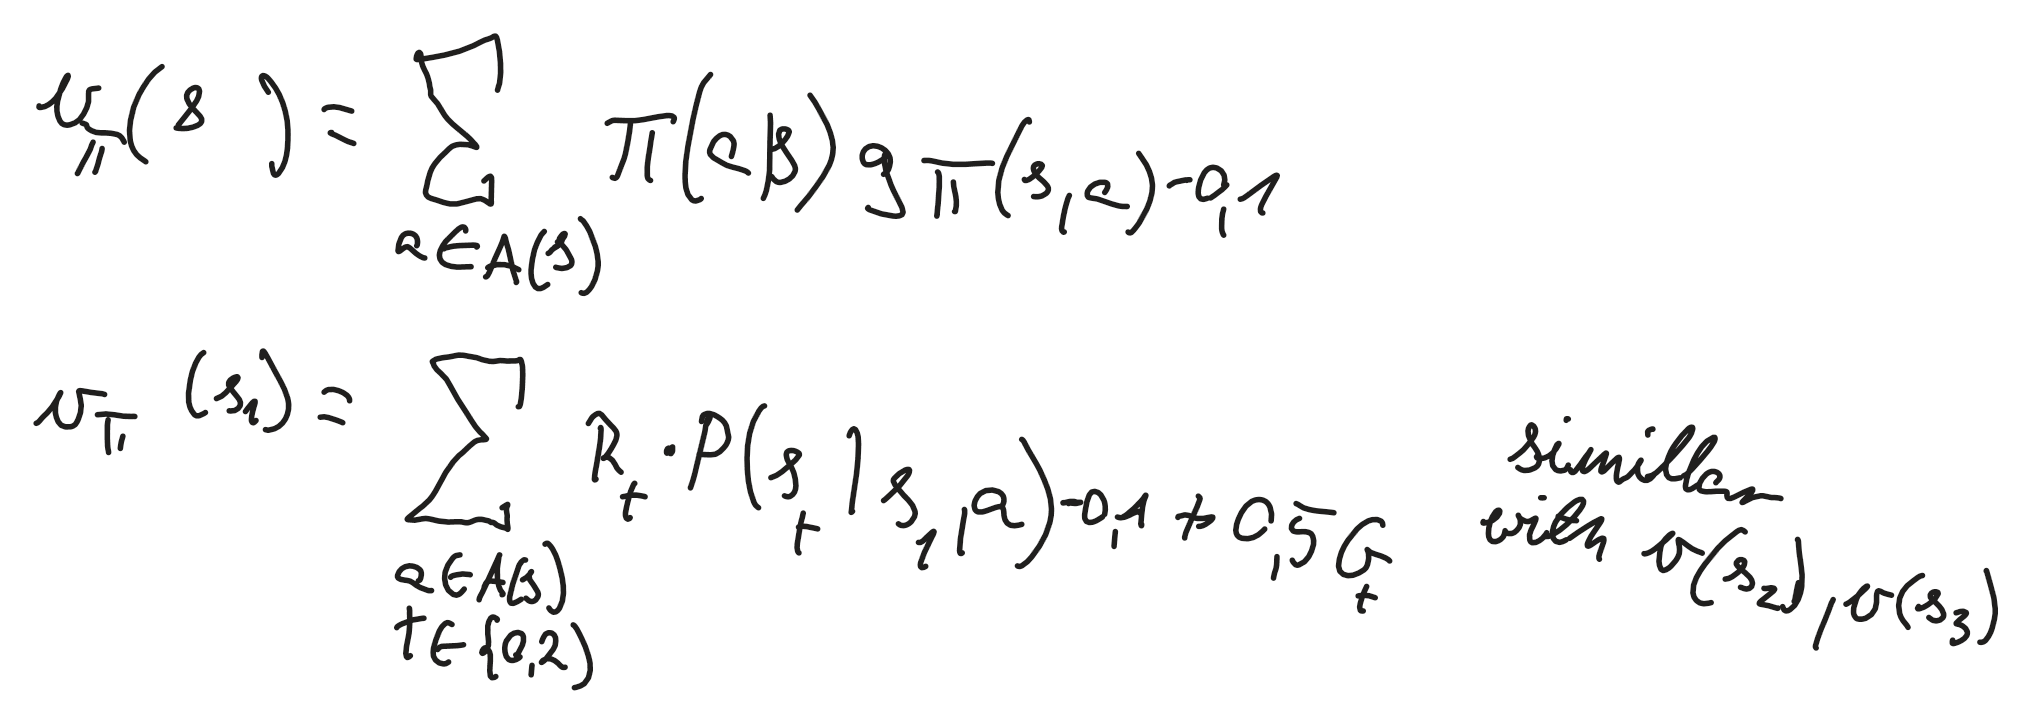

In [18]:
Image(filename='img/3_2_1.png')

#### Assignment 3.2.2
Cost of living (`-2`) should be reduced after every step, rest is similar, like in Assignment 3.1.1

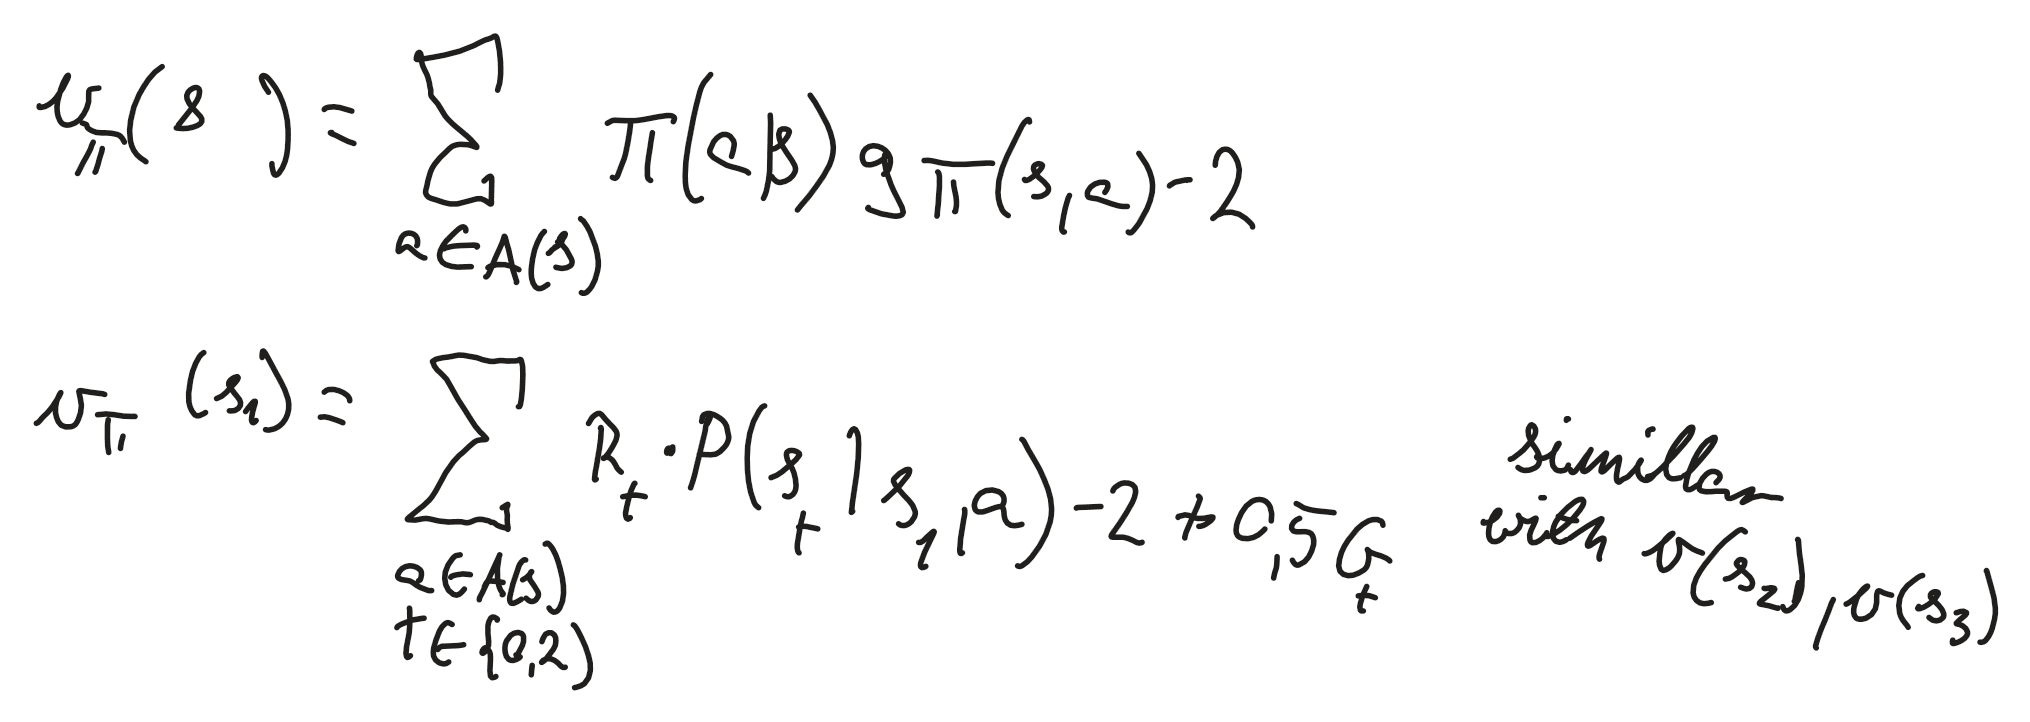

In [19]:
Image(filename='img/3_2_2.png')

#### Assignment 3.2.3
For the cost of living `-2` it makes sense for agent to go to the orange state from the leftmost gray position, as it will allow him to get only penalty of `-3` instead of `-5` if he went for the green state.

## Assignment 3.3

#### Assignment 3.3.1
[WIP] Similar, like in Assignment 3.1.1

In [20]:
# Image(filename='img/3_3_1.png')

#### Assignment 3.3.2
[WIP] Similar, like in Assignment 3.1.2

In [21]:
# Image(filename='img/3_3_2.png')

### Assignment 3.4

#### Assignment 3.4.1
If the Agent changes the policy to taking the highest $q$ it will always go for the green state, except for the case with cost of living `-2`. &q$ and $v$ will reflect that by counting returns for agent that tries to get to the green state.

#### Assignment 3.4.2
Yes, I believe that results make sens for the given policies. Here I also consider the general formulas as the result, as counting infinite number of steps would be hard, so given that they make sens.